# Lab4: Math Primer and Simple Neural Networks

In [2]:
!pip install psyneulink


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


Imports Successful
This will be our color palette


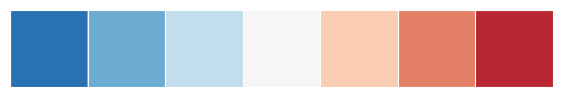

In [3]:

import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline
from mpl_toolkits import mplot3d
import psyneulink as pnl

# This couple of lines sets our color palette
import seaborn as sb
sb.palplot(sb.color_palette("RdBu_r", 7))
sb.set_palette("RdBu_r",7)
sb.set_style("whitegrid")

print("Imports Successful")
print("This will be our color palette")

# Part 1: Mathematics Primer for PsyNeuLink

Computational modeling in psychology and cognitive neuroscience uses a variety of math.  This primer reviews some useful concepts and equations, including vectors, matrices, derivatives, and logistic functions.  

Here are some additional resources overlapping and going beyond what is covered here:  

[Linear Algeabra](https://www.deeplearningbook.org/contents/linear_algebra.html)

[Deep Learning Cheatsheet](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning)

Neural networks are inspired by real neurons, simplified to model two key properties: firing and connectivity.  Artificial neurons can be active or inactive and connected to other artificial neurons by weights.  Each neuron receives a set of inputs and applies an operation (typically non-linear) to produce a single output.  That output is then sent via weighted connections to other neurons.  Neurons are usually grouped into layers.  Layers transform inputs using weights and biases, which can be pre-set or learned through multiple iterations and used to extract qualitatively meaningful features of the raw data.  
  
In order to understand how artificial neurons and neural networks work, we need to understand the math that they use.





# Scalars, Vectors, & Matrices

A **scalar** is a number used to quantify magnitude (e.g. temperature), while a **vector** is a number used to quantify magnitude and direction (e.g. wind).  

Vectors are typically formatted as a list of numbers with each number corresponding to one direction.  Familiar Cartesian coordinates have 2 dimensions, X & Y, and a vector in Cartesian coordinates is 1x2, a one dimensional list with two numbers.   For example, south-north is the Y axis and west-east is the X axis.  The vector 3, 4 indicates wind moving both 3 mph north and 4 mph west, but the combination of these components is a vector of wind moving 5 mph northwest (thanks to the pythagorean theorem, a^2 + b^2 = c^2).  The magnitude is the distance from the origin 0,0, in this case 5.  The vector itself is one dimensional and can be depicted as an arrow starting at 0,0 and extending to 3,4 in these Cartesian coordinates.    
<br>
(***Note:*** A number with magnitude AND 2 or more directions is called a **tensor**.  One way to think of a basic tensor is pinching and pulling a rubber sheet toward you: there is a magnitude of force pulling back toward the initial position (you could use this to launch a pebble like a slingshot) and there is also a magnidue of tension in the rubber sheet itself that will contract back when you let go.  Tensors are used to describe gravity in general relativity.   
<br>
Vectors are typically formatted as one-dimensional data structures or lists, 1xN, with N as the length of the list.  A **matrix** is a two dimensional, NxN, data structures. 


# Vector & Matrix Operations

In this section, we will briefly discuss matrix and vector operations. If you are already familiar with them, feel free to skip or skim as you see fit. 
  
Like scalars, vectors and matrices of numbers can be added and multiplied. However, these operations differ from their scalar counterparts, and are heavily dependent on dimensionality.  Matrix and vector dimensions are given as (r x c) where r is the number of rows, and c is the number of columns.  Individual vectors are 1 dimensional and notated as a single row (1 x c) or as a single column (r x 1).  

For example:  
  
\begin{equation}
a =
\left[
\begin{matrix}
a_{1} & a_{2} & a_{3}
\end{matrix}
\right]
;  b =
\left[
\begin{matrix}
b_{1} \\ b_{2} \\ b_{3}
\end{matrix}
\right]
; C =
\left[
\begin{matrix}
C_{11} & C_{12} & C_{13} \\ C_{21} & C_{22} & C_{23} \\ C_{31} & C_{32} & C_{33}
\end{matrix}
\right]
\end{equation}
  
  
Vector $a$ Is a [1x3] vector, called a row vector. Vector $b$ is a [3x1] vector, called a column vector. C is a 3x3 matrix. The components of a matrix C are denoted Cij , where i is the row index and j is the column index, so ij gives the position of the component in the matrix.     
  
When performing operations on vectors, it is easiest to represent a vector as a column vector, and a corresponding row vector as its “transpose”. 
  
\begin{equation}
a=
\left[
\begin{matrix}
a_{1} \\ a_{2} \\ a_{3}
\end{matrix}
\right]
; a^T=
\left[
\begin{matrix}
a_{1} & a_{2} & a_{3}
\end{matrix}
\right]
\end{equation}  
  
Matrices of the same dimension can be added component-wise, and the result is a new matrix of the same dimension.  
  
\begin{equation}
\left[
\begin{matrix}
a_{1} \\ a_{2} \\ a_{3}
\end{matrix}
\right]
+
\left[
\begin{matrix}
b_{1} \\ b_{2} \\ b_{3}
\end{matrix}
\right]
=
\left[
\begin{matrix}
a_{1} + b_{1}\\ a_{2} + b_{2} \\ a_{3} + b_{3}
\end{matrix}
\right]
\end{equation}  
  
Matrix subtraction works precisely the same way. A matrix can also be multiplied by a scalar by multiplying every component of a matrix by that scalar.  
  
\begin{equation}
\alpha \left[
\begin{matrix}
a_{1} \\ a_{2} \\ a_{3}
\end{matrix}
\right]
=
\left[
\begin{matrix}
\alpha a_{1} \\ \alpha a_{2} \\ \alpha a_{3}
\end{matrix}
\right]
\end{equation}
  
However, there are multiple types of vector muliplication. Today, we will only treat one type of vector multiplication: the “dot product”, or “inner product”.  
  
A dot product is the sum of component-wise multiplication of vectors. To perform it, we first multiply each component of the first vector by its corresponding component of the second vector, then we sum the resulting products. The result of a dot product is a scalar.  
  
\begin{equation}
c =
\sum\limits_{i} a_{i} b_{i}
\end{equation}  
    
In vector notation, the dot product can be written as follows  
  
\begin{equation}
b \cdot a = b^T a = 
\left[
\begin{matrix}
b_{1} & b_{2} & b_{3}
\end{matrix}
\right]
\left[
\begin{matrix}
a_{1} \\ a_{2} \\ a_{3}
\end{matrix}
\right]
=a_{1}b_{1} + a_{2}b_{2} + a_{3}b_{3}  
=c
\end{equation}  
  
Note that the product only works if its “inner dimensions”, the number of columns of b and the number of rows of a, are the same.

---
## Exercise 1: 
**What happens if we try to compute a dot product from vectors whose inner dimensions are different?  (Write some code in Python that tries to compute the dot product from vectors with different inner dimensions.  Report and interpret the error.)**  ---



The second notation (showing the row and column) is especially useful when considering matrix multiplication. In the sciences, it is convenient to think of matrices as collections of numbers. However, it is important to note that in mathematics, matrices are data constructs, which can be comprised of numbers or symbols, and their primary operations are governed by their dimension.  
  
If we wish to multiply a single vector (x) by a set of vectors {A}, rather than doing so individually, we can form the vectors in A into a matrix (which we will also call A), by storing their transposes in the rows of A. Then, we can sequentially compute the dot product of each vector in A with x, and store their results in a new vector, y, which will have the same dimensions as x.  
  
For example, let there be a set of two vectors 
\begin{equation}
\overrightarrow{a_{1}}=
\left[
\begin{matrix}
a_{11} \\ a_{21} \\ a_{31}
\end{matrix}
\right]
\end{equation}

and its transpose 
\begin{equation}
\overrightarrow{a_{1}}^T=
\left[
\begin{matrix}
a_{11} & a_{12} & a_{13}
\end{matrix}
\right]
\end{equation}

.

$ \overrightarrow{a_{2}} $ is similar to $ \overrightarrow{a_{1}}$ .  
  
Now, let A be

\begin{equation}
A = 
\left[
\begin{matrix}
\overrightarrow{a_{1}}^T \\ \overrightarrow{a_{2}}^T
\end{matrix}
\right]
=
\left[
\begin{matrix}
a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23}
\end{matrix}
\right]
\end{equation}  
  
Then the product Ax is  
  
\begin{equation}
Ax = 
\left[
\begin{matrix}
a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23}
\end{matrix}
\right]
\left[
\begin{matrix}
x_{1}\\x_{2}\\x_{3}
\end{matrix}
\right]
=
\left[
\begin{matrix}
\overrightarrow{a_{1}} \cdot x \\ \overrightarrow{a_{2}} \cdot x \\ \overrightarrow{a_{3}} \cdot x
\end{matrix}
\right]
=
\left[
\begin{matrix}
y_{1} \\ y_{2} \\ y_{3}
\end{matrix}
\right]
=
y
\end{equation}  
    
Matrix multiplication is what we use if we want to multiply a set of vectors ${B}$ by the vectors in $A$, we can perform a similar operation as before. We store the vectors in ${B}$ in the columns of a matrix (also called $B$). Then, we compute the dot product of each vector in the columns of $B$ with each vector in the rows of $A$. We store the results, as we did before, in a new set of column vectors, a matrix $C$. $C$ will have the “outer dimensions” of $A$ and $B$ (the same number of rows as $A$ and the same number of columns as $B$).  
  
For example, let there be two vectors b such that $ \overrightarrow{b_{1}} =
\left[
\begin{matrix}
b_{11} \\ b_{21} \\ b_{31}
\end{matrix}
\right] $ and $ \overrightarrow{b_{2}} $ be similar. Then B is given by  
  
\begin{equation}
B =
\left[
\begin{matrix}
b_{11} & b_{12} \\ b_{21} & b_{22}  \\ b_{31} & b_{32}
\end{matrix}
\right]
\end{equation}  
  
\begin{equation}
AB =
\left[
\begin{matrix}
a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23}
\end{matrix}
\right]
\left[
\begin{matrix}
b_{11} & b_{12} \\ b_{21} & b_{22}  \\ b_{31} & b_{32}
\end{matrix}
\right]
=
\left[
\begin{matrix}
\overrightarrow{a_{1}} \cdot \overrightarrow{b_{1}} & \overrightarrow{a_{1}} \cdot \overrightarrow{b_{2}} \\ \overrightarrow{a_{2}} \cdot \overrightarrow{b_{1}} & \overrightarrow{a_{2}} \cdot \overrightarrow{b_{2}}
\end{matrix}
\right]
=
\left[
\begin{matrix}
c_{11} & c_{12} \\ c_{21} & c_{22}
\end{matrix}
\right]
=
C
\end{equation}  
  
The components of C are therefore given by $ c_{ij} = a_{i} \cdot b_{j} $  
  
In this case, the product BA also exists. However, it is very important to understand that matrix multiplication does not commute: $ AB \neq BA.$

---

## Exercise 2:
**Let D be a 4x2 matrix and E be a 2x7 matrix, what are the dimensions of DE? What are the dimensions of ED?**

---


## Logistic Function

The logistic function is useful because it is bounded between 0 and 1, and determined by a few basic parameters: gain, bias, & offset.   Plotting a basic logistic function looks like this:  

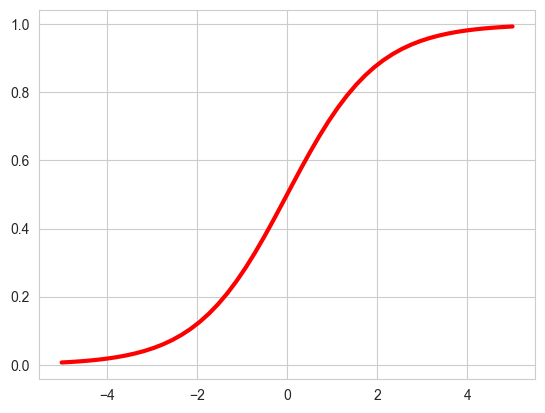

In [4]:
logistic_transfer_demo = pnl.TransferMechanism(function=pnl.Logistic(gain=1, bias=0, offset=0))
logistic_transfer_demo.plot()

In the cell below you can plug a single number into this function and get an output value.  Your input corresponds to a point on the x axis, and the output is the corresponding y value (height of the point on the curve above the x you specified).  

In [5]:
logistic_transfer_demo.execute([-2])

array([[0.11920292]])

### Logistic Step Function
Gain determines how steep the central portion of the S curve is, with higher values being steeper.  Bias shifts the curve left or right.  You can turn the logistic function effectively into a step function that works as a threshhold by increasing gain.  The step in the step function (where it crosses through 0.5 on the Y axis) is located on the X axis at (offset/gain) + bias. 

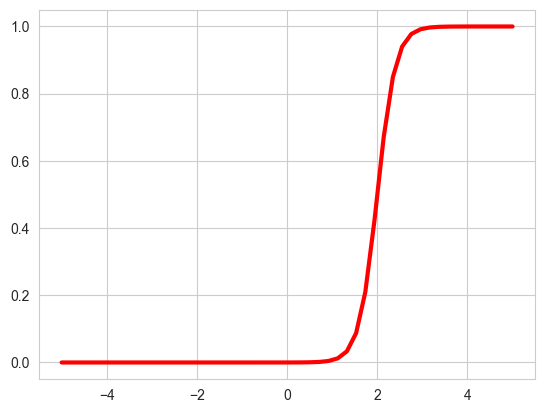

In [6]:
logistic_transfer_step = pnl.TransferMechanism(function=pnl.Logistic(gain=5,offset=10, bias=0))
logistic_transfer_step.plot()

Negative values of gain mirror reverse the S curve accross the vertical axis, centered at the x value of (offset/gain)+bias.  Below notice that offset/gain is -2 (10/-5), and at an X value of -2 the Y value is 0.5.  

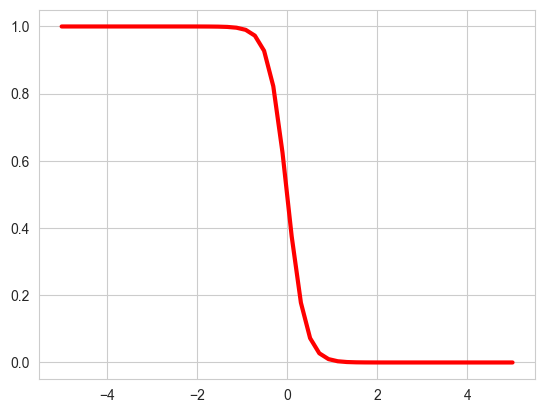

In [7]:
logistic_transfer_mirror = pnl.TransferMechanism(function=pnl.Logistic(gain=-5, bias=0, offset=0))
logistic_transfer_mirror.plot()

### Gain, Offset, & Bias

Imagine you have a neuron that has to decide whether to fire or not based upon its own parameters and some input.  Let's say this artificial neuron is a greater-than-0-detector for its input -- if the input is greater than 0 it fires, otherwise it will not fire.  Now if the neuron receives input [4] it will fire.  If it receives [-3] it will not fire.  In this simplified scenario, gain is a parameter that multiplies input by some value (e.g. multiply everyting by 2, or by 0.15, or whatever you choose), and bias is a parameter that changes the threshold (e.g. bias -2 shifts the threshold down from 0 to -2, turning the neuron into a greater than -2 detector, while bias +2 shifts the threshold up to 2).  

The actual logistic function is a bit more complicated than this example: within the logistic function bias and gain are parameters in the denominator's exponent -- you don't need to know the exact equation, but one reason a logistic function is useful is that its output is bounded between 0 and 1.  

Try changing the values of bias, offset, and gain in the two cells above, and see how it impacts the graph (execute the cell two above and then the cell one above to see the effect after you change these parameters).  The default values are gain = 1, offset = 0, and bias = 0.  

You should notice two propoerties of the logistic function: 1) the steepness of the S-shaped curve [gain], and 2) where the midpoint y-value of 0.5 aligns with the x axis [bias].  **Increasing gain above 1 will make the curve steeper.  Decreasing gain to a fraction between 0 and 1 will make the curve shallower.  Increasing or decreasing bias will shift the curve right or left.  If you want to shift the curve proportional to gain, offset can do this, shifting the curve left or right by (offset/gain).** 

# Part 2: Perceptron and XOR 

##  <a id='m0'> History of Artificial Neural Networks</a> 

To first approximation, activity of a neuron in the brain is determined by the integration of excitatory and inhibitory impulses received by its dendrites and passed to the cell body. If excitatory signals outweigh inhibitory signals sufficiently to pass a threshold, the neuron will fire, sending out an action potential via its axon.  
  

Artificial neurons were conceived to behave in a similar manner to real ones. Early artifical neurons were dubbed perceptrons; they received multiple binary inputs, multiplied each one by an appropriate “weight”, added them together (this should sound familiar), and produced a single binary output that depends on whether the sum passes a certain threshold.  In short, they applied a step function to the transformed input.  This is referred to as an LBF (linear basis function) activation function.  
  
<img src='https://drive.google.com/uc?id=1OpA3Nq2y_QqwcIxJqwCoiMQFVztYrhon'>  
  
If we define the threshold $ \equiv-b $, then we can rewrite our conditional output  
  
\begin{equation}
 output=
\begin{cases}
 0 & if \: w \cdot x + b \leq 0
\\
1  & if \: w \cdot x + b >  0
\end{cases}
\end{equation}  
  
The term $b$ is called a bias, and perceptrons are a special kind of linear classifier called a binary classifier. It is known as a binary classifier because it is assigning one of two labels (the binary output) to the inputs it receives, according to their dot product with the weights (a linear operation). The line defined by $ w \cdot x+b=0 $ is the line that separates the classes from each other. Our “red square, blue circle” class example from earlier in the lab is an example of binarily classifiable data.  
  
<img src="https://drive.google.com/uc?id=12ChAFalPgyPvzZ9srt8LSz1bd5hcsouE">  
  
In a multilayer feedforward network, artificial neurons are clustered into layers, where the output of one layer forms the input of the next. The first layer is known as the input layer, the last is the output layer, and the operational layers, where the dot products are computed, are called “hidden layers”. 


Binary classification is simple but powerful. We will show this by using them to construct a set of logic gates, beginning with AND. An AND gate is a logic gate that answers the question, “are A and B both true?”. The value 1 corresponds to True, and the value 0 corresponds to False.

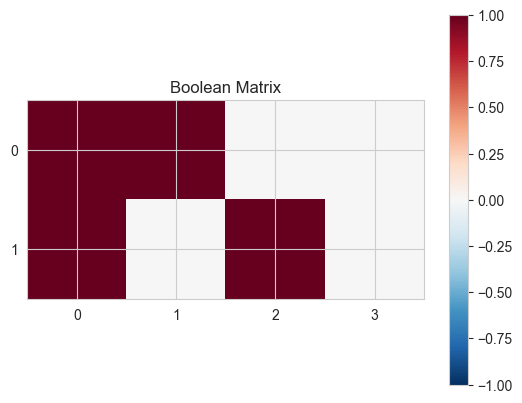

In [8]:
#This generates a training set of all possible 2-piece combinations of the boolean values True (1) and False (0).
#These combinations will be our "examples" that we train our perceptrons on. They are stored in the columns of X.

Bool=np.array([[1,1],[1,0],[0,1],[0,0]])
Bool=Bool.T
n_combos=np.shape(Bool)[1]
ub=np.amax(np.amax(abs(Bool)))
lb=-ub

#These are the "labels", the correct return values for our perceptron. When we train our network, we want it to learn
#what values of [w] and [b] to apply to the examples to that the function returns the correct label for every
#example.
AND_labels=np.array([1,0,0,0])
AND_labels.shape=((1,n_combos))


plt.figure()
plt.title('Boolean Matrix')
plt.xticks(np.arange(0,n_combos))
plt.yticks(np.arange(0,2))
plt.imshow(Bool,cmap='RdBu_r',vmin=lb,vmax=ub)
plt.colorbar()
plt.show()


For a simple gate like this, we can easily choose our weights and bias manually to correctly classify each example. However, However, we dould rather the perceptron learn the weights itself. We can train it using supervised learning by showing it examples of the data with the appropriate labels (a truth table). Random weights will generate a random answer, so the perceptron must change its weights when its output does not match the labels we gave it.  
  
For perceptrons, we use error-based learning, where the weights are adjusted in the correct direction, based on the size and direction of the error. This is given by the Perceptron Learning Rule, and is written mathematically as:  
  
\begin{equation}
w_{ij} \rightarrow w_{ij}+ \eta (desired \ label - predicted \ label) in_{i}
\end{equation}  
  
The positive parameter $ \eta $ encodes the learning rate.

##  <a id='m1'>Learning the AND Gate</a> 


Use the perceptron learning rule and the provided skeleton codeto create an AND gate.  Choose your learning rate to be 0.02.  Because our training set is very small, we may need to feed it to the perceptron multiple times. Construct your program to continually run the perceptron until its accuracy is perfect. 

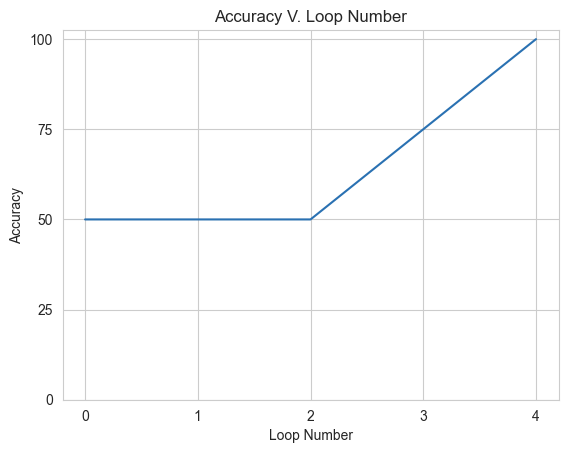

In [9]:
#Begin by initializing the weights to random values, using np.random .
w=np.random.rand(1,2)*10
b=-1
eta=np.array([.3,.3])
accuracy=0
loop_count=0
acc_vec=[]

while accuracy != 100:
    accuracy=0
    for i in range (np.shape(Bool)[1]):
        if w@Bool[:,i]+b<=0:
            predicted_label= 0
        else:
            predicted_label= 1
        if predicted_label==AND_labels[:,i]:
            accuracy=accuracy+1
        else:
            diff=(AND_labels[:,i]-predicted_label)
            w=w+eta*diff*(Bool[:,i].T)
    accuracy=int((accuracy/n_combos)*100)
    acc_vec=np.append(acc_vec,accuracy)
    loop_count=loop_count+1
lc=loop_count

plt.figure()
plt.plot(acc_vec)
plt.title('Accuracy V. Loop Number')
plt.xlabel('Loop Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,int(lc)))
plt.yticks([0,25,50,75,100])
plt.show()


---
##  <a id='e3'>Exercise 3:  Learning the OR Gate</a> 
**An OR gate should classify [0,0] as False, and [0,1], [1,0], and [1,1] as True.  Modify the code above in a new cell that implements a perceptron that learns the OR gate classificiation.**  

---

This method works well for a single layer of perceptrons. Now, consider multiple layers of perceptrons, each operating linearly, but producing a step function output. When they produce an incorrect result, how do we know which layer is responsible for the mistake and what step size would be useful to correct it?
  
Because of their binary output, linearly updating weights of perceptrons in a multilayer network produces unpredictable and problematic results. A natural solution is to replace the step function with a function that more gradually interpolates between 0 and 1. A good choice here is the logistic function, which we have encountered in the previous section. It is possible to generalize the Perceptron Learning Rule to this case using calculus; the details are presented in the Appendix at the end of this notebook. We suggest that you skim the Appendix now, and then read it more carefully after you have finished this lab. Once you understand this derivation, you will be in good shape for when we discuss the Backpropagation algorithm in the next lab.

##  <a id='m2'> PNL Two Layer Network</a> 

It is reasonably straightforward to create a two layer sigmoid net in numpy. However, doing so in PNL is almost trivial. We will build one for our logic gates now. 

Explore the effectiveness of this 2 layer network by running it at different learning rates, for different numbers of trials, and on different label sets. 

Which sets does it learn effectively? Which sets doesn't it?


/Users/younesstrittmatter/Documents/GitHub/younesStrittmatter/princeton/psyneulink-related/502B/.venv/lib/python3.11/site-packages/psyneulink/library/compositions/autodiffcomposition.py:1436: UserWarning: The execution_mode argument was not specified in the learn() method of 'autodiff_composition-4'; ExecutionMode.PyTorch will be used by default.
  warnings.warn(f"The execution_mode argument was not specified in the learn() method of '{self.name}'; "


The last loss was  [0.00144974]


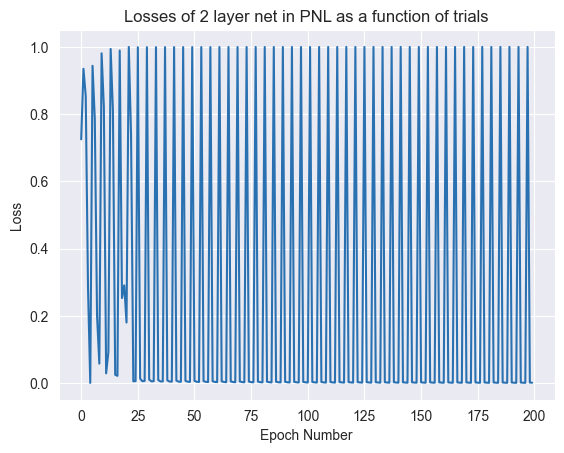

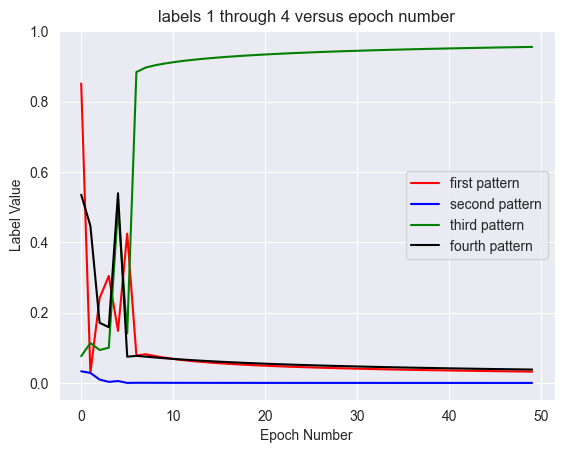

In [15]:
trials=10000
#to give the network extra flexibility, we include an extra dimension in the input whose value is always equal to 1
#another way to get this same flexibility would be to allow our linear layers to have non-zero bias values 
Bool_bias=[[1,1,1],[1,0,1],[0,1,1],[0,0,1]]
bool_length=np.shape(Bool_bias)[1]

#Note that our new set of inputs, Bool_bias, has a third term appended to each input. This is a bias.
#PNL is capable of training biases, but when using the method we will be incorporating for the
#following exercises, the biases implemented by PNL will not be trained.
#To resolve that issue, we simply implement them here.

AND_labels_pnl=[[1],[0],[0],[0]]
OR_labels_pnl= [[1],[1],[1],[0]]
XOR_labels_pnl=[[0],[1],[1],[0]]
rat=int(trials/n_combos)

#Specify which label set you would like to use.
labels=XOR_labels_pnl

#Creating a 2 layer net in PNL:
#First, we create the input layer. This layer is simply a Transfer Mechanism that brings the examples into the network
#We do not have to specify a function (it defaults to linear, slope = 1, intercept = 0), 
#but we do need to specify the size, which will be the size of our input array.

in_layer=pnl.TransferMechanism(input_shapes=bool_length,function=pnl.Linear)

#Next, we specify our output layer. This is where we do our sigmoid transformation by simply applying the Logistic function.
#The size we specify for this layer is the number of output nodes we want. In this case, we want the network to return a scalar
#for each example (either a 1 or a zero), so our size is 1

out_layer=pnl.TransferMechanism(input_shapes=1,function=pnl.Logistic)

#Finally we create a projection mapping from input to output. We will initialize with random weights.

weights = pnl.MappingProjection(name='in_to_out',
                            matrix=np.random.rand(bool_length,1),
                            sender=in_layer,
                            receiver=out_layer)


#Now, we will put them together into an Autodiff Composition. These compositions are a faster option
# for backpropagation learning that integrate PNL and pytorch.

logic2L = pnl.AutodiffComposition(
    learning_rate=10
  )

#We will now add our layers and projection map into our composition
logic2L.add_node(in_layer)
logic2L.add_node(out_layer)

out_layer.log.set_log_conditions(pnl.VALUE)

logic2L.add_projection(sender=in_layer, projection=weights, receiver=out_layer)


# To learn our desired gates, we train the autodiff composition by giving it an input dictionary and running it
input_dict = {"inputs":{in_layer: Bool_bias},"targets":{out_layer: labels},"epochs":50}
result = logic2L.learn(inputs=input_dict)

# Here, we acquire a log of the losses over time so we can see how our network learned
#This portion acquires and plots the losses
exec_id = logic2L.default_execution_id
losses = logic2L.parameters.torch_losses.get(exec_id)

print("The last loss was ", losses[-1])

plt.plot(losses)
plt.title('Losses of 2 layer net in PNL as a function of trials')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

#This portion acquires and plots the labels

#the logged values of the output layer that were recorded during the training
data=out_layer.log.nparray()[1][1][-1][1:]

#psyneulink stores the logged values as a list of length 200 (50 epochs x 4 inputs per epoch)
#we will reshape this list into an array of shape 50 x 4, so that each column represents one of the training patterns
#and each row represents one training epoch
num_outs=n_combos
length=np.shape(data)[0]
rat=int(length/num_outs)

data=np.reshape(data,(rat,num_outs))
data=np.matrix(data)
labs_1=np.array(data[:,0])
labs_2=np.array(data[:,1])
labs_3=np.array(data[:,2])
labs_4=np.array(data[:,3])

plt.plot(labs_1,label='first pattern',color='red')
plt.plot(labs_2,label='second pattern',color='blue')
plt.plot(labs_3,label='third pattern',color='green')
plt.plot(labs_4,label='fourth pattern',color='black')
plt.legend()

plt.title('labels 1 through 4 versus epoch number')
plt.xlabel('Epoch Number')
plt.ylabel('Label Value')
plt.show()



To understand why our 2 layer net can't effectively learn the XOR labels, it may be helpful to consider the follwing graph: 



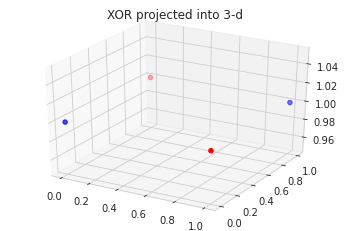

In [10]:
#convert to numpy arrays, as required for plotting functions
Bool_bias_np=np.array(Bool_bias)
#we will plot each point as red if the XOR relation is satisfied, and blue if not 
XOR_colors=['blue','red','red','blue']
ax=plt.axes(projection='3d')

ax.scatter(Bool_bias_np[:,0],Bool_bias_np[:,1],Bool_bias_np[:,2],color=XOR_colors)
plt.title('XOR projected into 3-d')
plt.show()

##  <a id='e3'>Exercise 4: Limitations of the Perceptron Learning Rule</a> 


**Looking at the graph above, why do you think that the network had trouble learning the XOR relation, but not the AND or the OR?**


This example was important from a historical perspective. In the 1960s, Marvin Minsky and Seymour Papert showed that it was impossible for a simple neural network such as this one to learn the XOR relation. This caused people to lose interest in neural networks for a long time. However the interest was revived in the 1980s with the development of the Backpropagation algorithm, which showed how to generalize the Perceptron Learning Rule to networks with any number of layers. The ability to train networks with more than two layers allowed them to effectively learn XOR, as well as many other much more complex relations. 

# BUILD

# Appendix: Derivation of Learning Rule for two-layer network with sigmoidal activation

Sigmoid neurons take inputs and produce outputs similar to perceptrons, however, the inputs and outputs are not binary. Additionally, rather than applying a simple dot product to the inputs such that
\begin{equation}
z(w,x) = w \cdot x + b
\end{equation}

these new types of neurons apply the sigmoid function, of the form

\begin{equation}
\sigma(z(w,x))=\frac{1}{1+e^{-z(w,x)}}
\end{equation}

. 
This function is actually the same as a Logistic function with a bias value of 0 and a gain value of 1. It has an upper bound at 1 and a lower bound at zero. This can be seen by examining the limits: $\lim_{z(w,x)\to\infty} \sigma(z(w,x))$ and $\lim_{z(w,x)\to -\infty} \sigma(z(w,x))$. Although its equation looks complex, a sigmoid function can quickly become intuitive when you try modifying the parameters, as we did in Lab 1 with the Logistic function. The graph below illustrates gives the graph of $\sigma(x)$.


<img src="https://drive.google.com/uc?id=11pGLSRaXt-eeBp37P0iTc3AmAsdb4Q1_"> 


In a multilayer network, the output of multiple sigmoid functions in the first non-input layer forms the input to the next layer. However, because of its bounded structure, a sigmoid function only outputs 1 or 0 at the limits (when rounding error kicks in). Typically its output will be somewhere in between. Therefore, there will always be some error between the desired output of a logical function (1 or 0) and the output of a sigmoid. The error of a single output is given by  
  
\begin{equation}
E=desired \ output - \sigma(z(w,x))
\end{equation}  
  
A common measure of error is called the mean squared error, and is given by  
  
\begin{equation}
E =
\frac{1}{n} \ \sum_{i=1}^{n} (desired \ output_{i} - \sigma(z(w,x))_{i})^2
\end{equation}  
  
Although we cannot drive this value to zero (when our desired output is binary), we can minimize it. Because it is a sum of squares, we can minimize it by minimizing each term. Because each term is a convex function of the weights, it is minimized when its derivative as a function of the weights is zero. We can train our neural net to do this using the delta rule, which is very similar to the perceptron learning rule. 

\begin{equation}
w^{t+1} = \underbrace{w^t}_\text{current weight} + \underbrace{\Delta w^t}_\text{weight change}
\end{equation}

where 

\begin{equation}
\Delta w^t = - \alpha \underbrace{\frac{\partial E^t}{\partial w^t}}_\text{change in error terms as a function of the weights}
\end{equation}

.
  
As you can see, when the derivative of the error is zero, the weights stop changing. The error is, at this point, minimized.  
  
In order to calculate the derviative of the error, we simply employ the chain rule. We will aslo be using a modified form of the error. Instead of scaling each term by $\frac{1}{n}$, we will scale by $\frac{1}{2}$ 

So, each error term is given by 
  
\begin{equation}
E_{i} =
\frac{1}{2} (desired \ output_{i} - \sigma(h(x))_{i})^2
\end{equation}  
  
and its derivative is given by  
  
\begin{equation}
\frac{\partial E_{i}}{\partial w} = \underbrace{\frac{\partial E_{i}}{\partial \sigma(h(w,x))}}_\text{derivative 1} \quad
\underbrace{\frac{\partial \sigma(h(w,x))}{\partial h(w,x)}}_\text{derivative 2} \quad
\underbrace{\frac{\partial h(w,x)}{\partial w}}_\text{derivative 3}
\end{equation}
  
Now, because $h(w,x)$ is a vector equation, its derivative is also a vector. This produces our vector of weight changes, each term of which is determined by derivative 3  
  
\begin{equation}
\quad
\underbrace{\frac{\partial h(w,x)}{\partial w_{i}}}_\text{derivative 3}
\end{equation}  
.

This comes out surprisingly tidily:  
  
\begin{equation}
{\frac{\partial E^t}{\partial w_{i}^t}}=(desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}  
  
Now 
\begin{equation}
\Delta w^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}
  
Biases are updated in much the same fashion, using
  
\begin{equation}
\Delta b^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))1
\end{equation}